## Instructions
1. Run all the cells sequentially. 
2. The experiments are based on the works (Ahuja et.al. https://arxiv.org/pdf/2002.04692.pdf) and (Arjosvsky et.al. https://arxiv.org/pdf/1907.02893.pdf). If anything is unclear about the methods please refer to the above papers.
3. We have comments in front of each command to guide one through the details of the implementation.



## Overview
1. In the first half of the notebook, we examine F-IRM game and V-IRM game (from Ahuja et.al.) for various different settings, e.g., different datasets, different number of environments, using different architectures MLP and CNN
2. In the latter half of the notebook, we examine IRM (Arjovsky et.al.) and standard empirical risk minimization (ERM). 


## External libraries used
1. We use several external libraries. Please ensure you have numpy, tensorflow (version used for this notebook 1.14), matplotlib, sklearn, pandas, copy.

## Internal libraries summary
1. data_constructor.py: in this file we define two classes <br>
    assemble_data_mnist( ): for creating colored environments for MNIST digits <br>
    assemble_data_mnist_fashion( ): for creating colored environments for MNIST fashion <br>


2. IRM_methods.py: in this file we define four classes <br>
    a) fixed_irm_game_model <br>
    b) variable_irm_game_model <br>
    c) irm_model <br>
    d) standard_erm_model <br>
    
    Each class is initialized using hyperparameters for the corresponding model.
    Each class has a fit method, which takes as input the data from the different environments and trains the models. Finally, each class has an evaluation method, which takes the test data from test environment as input and outputs the accuracy on the test data and also on the train data that was used.  

### data_constructor.py explained

The datasets used in Ahuja et.al. and Arjovsky et.al. essentially modified standard datasets such as MNIST digits, fashion MNIST to create multiple environments with different degrees of spurious correlations and the labels. Here we describe the classes that allow to create these datasets.

    1. data_constructor.py consists of two classes: assemble_data_mnist() and assemble_data_mnist_fashion() 
        a) assemble_data_mnist()/assemble_data_mnist_fashion() has following functions 
            i) create_training_data(n_e, p_color_list, p_label_list):
                n_e: number of environments, p_color_list: list of probabilities of switching the final label to obtain the color index, p_label_list: list of probabilities of switching pre-label
            ii) create_testing_data(p_color_test, p_label_test, n_e): 
                n_e: number of environments, p_color_test: probability of switching the final label to obtain the color index in test environment, p_label_test: probability of switching pre-label in test environment
        b)  assemble_data_mnist()/assemble_data_mnist_fashion() following attributes:
            i) data_tuple_list: list of length n_e, each element of the list is a tuple with three elements (data, label, environment index)
            ii) data_tuple_test: tuple with three elements (data_test, label_test, test environment index)
    

### IRM_methods.py explained

    1. fixed_irm_game_model class. Implements fixed-IRM game from Ahuja et.al.
    
        A) Initialization:
        fixed_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start)
           i) model_list: list of models for each environment; use keras to construct the architectures
           ii) learning_rate: learning rate for Adam optimizer for training the models for each environment
           iii) batch_size: size of the batch used for each gradient update
            iv) num_epochs: number of epochs is number of training steps = number of training samples//batch size (each epoch is one full pass of the training data)
            v) termination_acc: once the model accuracy falls below this threshold we terminate training
           vi) warm_start: minimum number of steps before we terminate due to accuracy falling below threshold

        B) Methods:
            i) fit(data_tuple_list): takes data_tuple_list and trains the models
                   data_tuple_list- list of length n_e, each element of the list is a tuple with three elements (data, label, environment index)     
            ii) evaluate(data_tuple_test): tuple with three elements (data_test, label_test, test environment index)

        C) Attributes:
            i) model_list: list of models for each environment
            ii) train_acc: training accuracy (use after running evaluate method)
            iii) test_acc: testing accuracy  (use after running evaluate method) 

    2. variable_irm_game_model class. Implements variable-IRM game from Ahuja et.al.. It has same hyperparameters, methods and attributes as  fixed_irm_game_model. 
    
        A) Initialization: variable_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start)
           i) model_list: list of models for each environment and the representation learner; note the main difference between variable_irm_game_model and fixed_irm_game_model is model_list also contains a model for the representation learner that we learn 
           ii) learning_rate: learning rate for Adam optimizer for training the models for each environment
           iii) batch_size: size of the batch used for each gradient update
            iv) num_epochs: number of epochs is number of training steps = number of training samples//batch size (each epoch is one full pass of the training data)
           v) termination_acc: once the model accuracy falls below this threshold we terminate training
            vi) warm_start: minimum number of steps before we terminate due to accuracy falling below threshold

        B) Methods:
            i) fit(data_tuple_list): takes data_tuple_list and trains the models
                   data_tuple_list: list of length n_e, each element of the list is a tuple with three elements (data, label, environment index)

            ii) evaluate(data_tuple_test): tuple with three elements (data_test, label_test, test environment index)

        C) Attributes:
            i) model_list: list of models for each environment
            ii) train_acc: training accuracy (use after running evaluate method)
            iii) test_acc: testing accuracy  (use after running evaluate method) 

    3. irm_model. Implements IRM v1 from Arjovsky et.al. 

        A) Initialization:
            irm_model(model_irm, learning_rate, batch_size, steps_max, steps_threshold, gamma_new)
            i) model_irm: a keras model passed as input
            ii) learning_rate: learning rate for Adam optimizer
            iii) batch_size: size of the batch per gradient update
            iv) steps_max: maximum number of gradient updates
            v) steps_threshold: threshold after which to update the penalty value
            vi) gamma_new: penatly to be used after steps_threshold, upto steps_threshold a penalty of gamma=1 is used


        B) Methods:
            i) fit(data_tuple_list): takes data_tuple_list and trains the model
                   data_tuple_list- list of length n_e, each element of the list is a tuple with three elements (data, label, environment index)     
            ii) evaluate(data_tuple_test): tuple with three elements (data_test, label_test, test environment index) 


         C) Attributes:
                i) train_acc: training accuracy (use after running evaluate method)
                ii) test_acc: testing accuracy  (use after running evaluate method) 

    4. standard_erm_model. Implements standard empirical risk minimization. 
        A) Initialization: 
            standard_erm_model(model_erm, num_epochs, batch_size):
                i) model_erm: a keras model passed as input
                ii) num_epochs: number of epochs
                iii) batch_size: size of batch per gradient update
                iv) learning_rate: learning rate for Adam optimizer
        
        B) Methods:
            i) fit(data_tuple_list): takes data_tuple_list and trains the model
                   data_tuple_list- list of length n_e, each element of the list is a tuple with three elements (data, label, environment index)     
            ii) evaluate(data_tuple_test): tuple with three elements (data_test, label_test, test environment index) 


         C) Attributes:
                i) train_acc: training accuracy (use after running evaluate method)
                ii) test_acc: testing accuracy  (use after running evaluate method)    
            



## IRM 

#### Training data:
Data from different environments $\mathcal{D} = \{\{(x_i^{q},y_i^{q}\}_{i=1}^{n_q}\}_{q=1}^{K}$, where $K$ is number of environments and $n_q$ is number of points in environment with index $q$.

#### Invariant predictor:  
Define a representation $\phi:\mathcal{X} \rightarrow \mathcal{Z}$ and a classifier $w: \mathcal{Z} \rightarrow \mathbb{R}^k$. The predictor is composite function $w\circ \phi$. We define a predictor $w\circ \phi$ to be invariant if a same classifier $w$ minimizes the risk across all the environments, i.e. $w \in \arg\min_{\bar{w}} R^{e}(\bar{w}\circ \phi), \forall e \in \{1,.., K\} $, where risk is expected loss of predictor w.r.t labels.

#### IRM from Arjovsky et.al. objective 

Consider the following alternate minimization problem 

$\min_{\phi} \sum_{q=1}^{K}R^{q}(\phi)  + \lambda \sum_{q=1}^{K}\nabla_{w |w=1.0} R^{q}(w.\Phi)$

We use the above objective to train a neural network that model for $\phi$ 


#### IRM games Ahuja et.al. objective 

Define a classifier for each environment $w^q: \mathcal{X} \rightarrow \mathbb{R}^k$ and $w^{av}= \frac{1}{K}\sum_{q=1}^{K}w^{q}$.  

The objective of each environment $e$ is $R^{e}(w^{av} \circ \phi) $, where $w^{av}= \frac{1}{K}\sum_{q=1}^{K}w^{q}$. 

In the F-IRM approach (F-IRM game). We fix $\phi$ to identity. Each environment takes turn to optimize $R^{e}(w^{av} \circ \phi) $. The environment $e$ updates the classifier  $w^e$ using SGD  step $R^{e}(w^{av} \circ \phi) $.

In the V-IRM approach (V-IRM game).  The objective of the representation learner  is $\sum_{q=1}^{K}R^{q}(w^{av} \circ \phi) $. The representation learner updates $\phi$ using SGD updates and between two updates environments takes turn to update $w^e$.
Each environment takes turn to optimize $R^{e}(w^{av} \circ \phi) $. The environment $e$ updates the classifier  $w^e$ using SGD  step $R^{e}(w^{av} \circ \phi) $.  







# Import external libraries

In [1]:
import tensorflow as tf
import numpy as np
import argparse
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
# import cProfile
import copy as cp
from sklearn.model_selection import KFold

In [2]:
print(tf.__version__)
tf.executing_eagerly()

1.14.0


True

# Import IRM libraries


In [3]:
from data_construct import * ## contains functions for constructing data 
from IRM_methods import *    ## contains IRM games methods 

# MNIST digits:  2 environments

Below we illustrate how to use our IRM methods. 
We first setup the data in the cell below.  We set p_color_list = [0.2, 0.1] (from experiments in Arjovsky et.al.); note that there is marginal difference between the probabilities of switching the labels in the two environments. This marginal difference is useful for IRM methods to learn invariant predictors across environments that exploit the shape of digits and not the color. 

In [19]:
# Create data for each environment

n_e = 2  # number of environments

p_color_list = [0.2, 0.1] # list of probabilities of switching the final label to obtain the color index
p_label_list = [0.25]*n_e # list of probabilities of switching pre-label
D = assemble_data_mnist() # initialize mnist digits data object

D.create_training_data(n_e, p_color_list, p_label_list) # creates the training environments

p_label_test = 0.25 # probability of switching pre-label in test environment
p_color_test = 0.9  # probability of switching the final label to obtain the color index in test environment

D.create_testing_data(p_color_test, p_label_test, n_e)  # sets up the testing environment
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape # attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for F-IRM game 

In the cell below, for each environment we initialize an architecture. We use the MLP architectue that was described in https://arxiv.org/pdf/2002.04692.pdf . 

If you decide to choose a new architecture, please take care to ensure that you keep the input shape as is that is length, width, and height (which we obtained above) and output shape as num_classes.

In [20]:
# we use same architecture across environments and store it in a list
model_list = [] 
for e in range(n_e):
    model_list.append(keras.Sequential([
            keras.layers.Flatten(input_shape=(length, width,height)),
            keras.layers.Dense(390, activation = 'elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
    ]))

### Select other hyper-parameters for the F-IRM game


In [21]:

num_epochs       = 25
batch_size       = 256
termination_acc  = 0.6
warm_start       = 100
learning_rate    = 2.5e-4

# other hyper-parameters to try 
# num_epochs       = 25
# batch_size       = 256
# termination_acc  = 0.53
# warm_start       = 100
# learning_rate    = 5e-4

### Initialize F-IRM model, fit and evaluate

In [22]:
# initialize F-IRM model (we pass the hyper-parameters that we chose above)
F_game = fixed_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
F_game.fit(D.data_tuple_list)

# evaluate function runs and evaluates train and test accuracy of the final model
F_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print ("Training accuracy " + str(F_game.train_acc)) 
print ("Testing accuracy " + str(F_game.test_acc))

Epoch: 0
Epoch: 1
Training accuracy 0.5963333249092102
Testing accuracy 0.6315000057220459


### Selecting termination_acc using training accuracy plot

1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.6 to be the value based on the plot. 

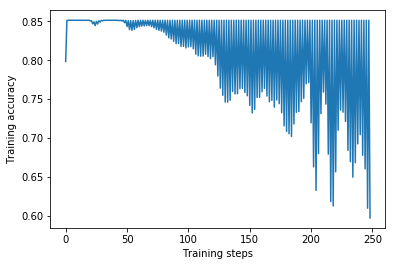

In [9]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(F_game.train_accuracy_results)

### Initialize the architecture for V-IRM game 

In the cell below, for each environment we initialize an architecture. We use the MLP architectue that was described in https://arxiv.org/pdf/2002.04692.pdf.

If you choose a new architecture, please take care to ensure that you keep the input shape as length, width, and height (which we obtained above) and output shape is num_classes.

In [16]:

model_list = [] # we use same architecture across environments and store it in a list and the last element of the list 
# corresponds to the architecture for the representation learner
for e in range(n_e+1):
    if(e<=n_e-1): 
        model_list.append( keras.Sequential([
            keras.layers.Flatten(input_shape=(390,1)),
            keras.layers.Dense(390, activation = 'elu'),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
        ]))
    if(e==n_e):
        model_list.append(keras.Sequential([
        keras.layers.Flatten(input_shape=(length, width,height)),
        keras.layers.Dense(390, activation = 'elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
      ]))

### Select other hyper-parameters for the V-IRM game


In [17]:

num_epochs       = 25
batch_size       = 256
termination_acc  = 0.55
warm_start       = 100
learning_rate    = 2.5e-4


### Initialize V-IRM model, fit and evaluate

In [18]:
# initialize V-IRM model (we pass the hyper-parameters that we chose above)
V_game = variable_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
V_game.fit(D.data_tuple_list) 

# evaluate function runs and evaluates train and test accuracy of the final model
V_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print (V_game.train_acc)
print (V_game.test_acc)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
0.4804333448410034
0.6653000116348267


### Selecting termination_acc using training accuracy plot


1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.55 to be the value based on the plot.  

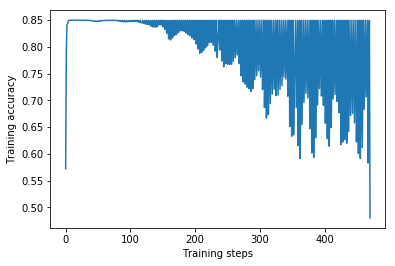

In [19]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(V_game.train_accuracy_results)

# Fashion MNIST: 2 environments

We replicate the same experiments as above for Fashion MNIST data. 

In [20]:
# Create data for each environment

n_e = 2    # number of environments

p_color_list = [0.2, 0.1]   # list of probabilities of switching the final label to obtain the color index
p_label_list = [0.25]*n_e   # list of probabilities of switching pre-label
D = assemble_data_mnist_fashion()  # initialize mnist fashion data object

D.create_training_data(n_e, p_color_list, p_label_list) # create the training environments
p_label_test = 0.25     # probability of switching pre-label in test environment
p_color_test = 0.9      # probability of switching the final label to obtain the color index in test environment

D.create_testing_data(p_color_test, p_label_test, n_e)  # create the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape # attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for F-IRM game 

In [27]:
# we use same architecture across environments and store it in a list
model_list = [] 
for e in range(n_e):
    model_list.append(keras.Sequential([
            keras.layers.Flatten(input_shape=(length, width,height)),
            keras.layers.Dense(390, activation = 'elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
    ]))

### Select other hyper-parameters for the F-IRM game

In [28]:

num_epochs       = 25
batch_size       = 256
termination_acc  = 0.6
warm_start       = 100
learning_rate    = 2.5e-4


### Initialize F-IRM model, fit and evaluate

In [29]:
# initialize F-IRM model (we pass the hyper-parameters that we chose above)
F_game = fixed_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
F_game.fit(D.data_tuple_list)

# evaluate function runs and evaluates train and test accuracy of the final model
F_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print ("Training accuracy " + str(F_game.train_acc)) 
print ("Testing accuracy " + str(F_game.test_acc))

Epoch: 0
Epoch: 1
Training accuracy 0.5774815082550049
Testing accuracy 0.6886666417121887


### Selecting termination_acc using training accuracy plot

1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.6 to be the value based on the plot. 

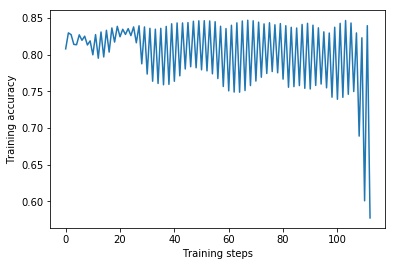

In [30]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(F_game.train_accuracy_results)

### Initialize the architecture for V-IRM game

In [40]:
model_list = [] # we use same architecture across environments and store it in a list and the last element of the list 
# corresponds to the architecture for the representation learner
for e in range(n_e+1):
    if(e<=n_e-1): 
        model_list.append( keras.Sequential([
            keras.layers.Flatten(input_shape=(390,1)),
            keras.layers.Dense(390, activation = 'elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
        ]))
    if(e==n_e):
        model_list.append(keras.Sequential([
        keras.layers.Flatten(input_shape=(length, width, height)),
        keras.layers.Dense(390, activation = 'elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
      ]))

### Select other hyper-parameters for the V-IRM game


In [41]:

num_epochs       = 25
batch_size       = 256
termination_acc  = 0.6
warm_start       = 100
learning_rate    = 2.5e-4


### Initialize V-IRM model, fit and evaluate

In [42]:
# initialize V-IRM model (we pass the hyper-parameters that we chose above)
V_game = variable_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
V_game.fit(D.data_tuple_list) 

# evaluate function runs and evaluates train and test accuracy of the final model
V_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print (V_game.train_acc)
print (V_game.test_acc)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
0.5962592363357544
0.5986666679382324


### Selecting termination_acc using training accuracy plot


1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.5 to be the value based on the plot.  

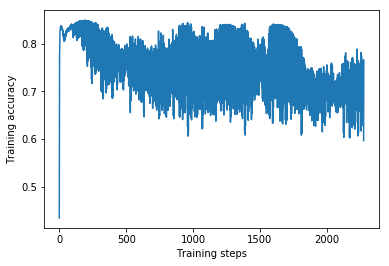

In [43]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(V_game.train_accuracy_results)

# Fashion MNIST: More environments

In the above experiments, we had 2 environments. We now explore the methods with more environments. We set number of environments to be 10. 

In [44]:
## Create data for each environment

n_e = 10      # number of environments

p_color_list = [0.2, 0.12, 0.19, 0.22, 0.16, 0.18,0.20, 0.14, 0.12, 0.1]  # list of probabilities of switching the final label to obtain the color index
p_label_list = [0.25]*n_e                                                 # list of probabilities of switching pre-label

D = assemble_data_mnist_fashion()                                         # initialize mnist fashion data object

D.create_training_data(n_e, p_color_list, p_label_list)                  # creates the training environments

p_label_test = 0.25     # probability of switching pre-label in test environment
p_color_test = 0.9      # probability of switching the final label to obtain the color index in test environment

D.create_testing_data(p_color_test, p_label_test, n_e)                   # creates the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape # attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for F-IRM game 

In the cell below, for each environment we initialize an architecture. We use the MLP architectue that was described in https://arxiv.org/pdf/2002.04692.pdf . 

If you decide to choose a new architecture, please take care to ensure that you keep the input shape as is that is length, width, and height (which we obtained above) and output shape as num_classes.

In [45]:
model_list = [] # we use same architecture across environments and store it in a list
for e in range(n_e):
    model_list.append(keras.Sequential([
            keras.layers.Flatten(input_shape=(length, width,height)),
            keras.layers.Dense(390, activation = 'elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
    ]))

### Select other hyper-parameters for the F-IRM game

In [46]:

num_epochs       = 25
batch_size       = 256
termination_acc  = 0.75
warm_start       = 10
learning_rate    = 2.5e-4

### Initialize F-IRM model, fit and evaluate

In [47]:
# initialize F-IRM model (we pass the hyper-parameters that we chose above)
F_game = fixed_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
F_game.fit(D.data_tuple_list)

# evaluate function runs and evaluates train and test accuracy of the final model
F_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print ("Training accuracy " + str(F_game.train_acc)) 
print ("Testing accuracy " + str(F_game.test_acc))

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Training accuracy 0.7479259371757507
Testing accuracy 0.6001111268997192


### Selecting termination_acc using training accuracy plot


1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.75 to be the value based on the plot.

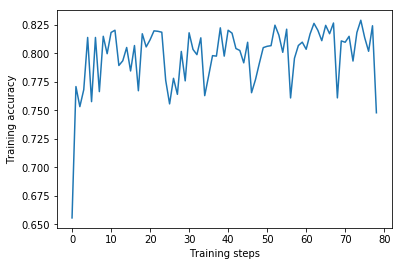

In [48]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(F_game.train_accuracy_results)

### Initialize the architecture for V-IRM game

In the cell below, for each environment we initialize an architecture. We use the MLP architectue that was described in https://arxiv.org/pdf/2002.04692.pdf . 

If you decide to choose a new architecture, please take care to ensure that you keep the input shape as is that is length, width, and height (which we obtained above) and output shape as num_classes.

In [49]:
model_list = [] # we use same architecture across environments and store it in a list and the last element of the list 
# corresponds to the architecture for the representation learner
for e in range(n_e+1):
    if(e<=n_e-1): 
        model_list.append( keras.Sequential([
            keras.layers.Flatten(input_shape=(390,1)),
            keras.layers.Dense(390, activation = 'elu'),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
        ]))
    if(e==n_e):
        model_list.append(keras.Sequential([
        keras.layers.Flatten(input_shape=(length, width,height)),
        keras.layers.Dense(390, activation = 'elu'),
      ]))

### Select other hyper-parameters for the V-IRM game


In [50]:
num_epochs       = 25
batch_size       = 64
termination_acc  = 0.75
warm_start       = 25
learning_rate    = 2.5e-4

### Initialize V-IRM model, fit and evaluate

In [51]:
# initialize V-IRM model (we pass the hyper-parameters that we chose above)
V_game = variable_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
V_game.fit(D.data_tuple_list) 

# evaluate function runs and evaluates train and test accuracy of the final model
V_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print (V_game.train_acc)
print (V_game.test_acc)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
0.7461296319961548
0.5669999718666077


### Selecting termination_acc using training accuracy plot


1. Start by setting a very low termination accuracy value say 0.1 and large number of epochs. 
2. Plot the training accuracy plot to see the range of oscillations; use the minimum value around which oscillation occurs as the threshold 

3. In the above experiment, we found 0.75 to be the value based on the plot.

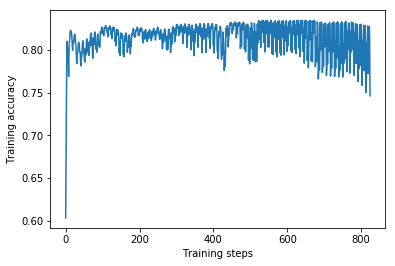

In [52]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(V_game.train_accuracy_results)

# Fashion MNIST: a simple CNN architecture

In [57]:
## Create data for each environment

n_e = 2
p_color_list = [0.2, 0.1]
p_label_list = [0.25]*n_e
D = assemble_data_mnist_fashion()  ## assemble_data_mnist() initializes an object whose attributes contain the information about mnist digits data that we create
## this can be replaced with assemble_data_fashion_mnist() for fashion mnist data
D.create_training_data(n_e, p_color_list, p_label_list) ## sets up the training environments
p_label_test = 0.25
p_color_test = 0.9
D.create_testing_data(p_color_test, p_label_test, n_e)  ## sets up the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape ## obtain attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for F-IRM game 

In the cell below, for each environment we initialize an architecture. We use a very simple CNN architectue for illustrative purposes. 

If you decide to choose a new architecture, please take care to ensure that you keep the input shape as is that is length, width, and height (which we obtained above) and output shape as num_classes.

In [58]:

model_list = [] # we use same architecture across environments and store it in a list
for e in range(n_e):
    model_list.append(keras.Sequential([
           keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='elu', input_shape=(length,width,height)),
                keras.layers.Flatten(),
            keras.layers.Dense(390, activation = 'elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='elu'),
             keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
    ]))

### Select other hyper-parameters for the F-IRM game

In [59]:

num_epochs       = 25
batch_size       = 64
termination_acc  = 0.65
warm_start       = 10
learning_rate    = 2.5e-4

### Initialize F-IRM model, fit and evaluate

In [60]:
# initialize F-IRM model (we pass the hyper-parameters that we chose above)
F_game = fixed_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

# fit function runs the training on the data that we created
F_game.fit(D.data_tuple_list)

# evaluate function runs and evaluates train and test accuracy of the final model
F_game.evaluate(D.data_tuple_test) 

# print train and test accuracy
print ("Training accuracy " + str(F_game.train_acc)) 
print ("Testing accuracy " + str(F_game.test_acc))

Epoch: 0
Training accuracy 0.6464444398880005
Testing accuracy 0.5648888945579529


### Selecting termination_acc using training accuracy plot

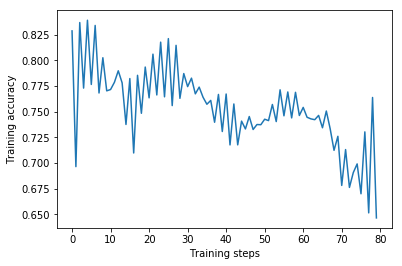

In [61]:
plt.xlabel("Training steps")
plt.ylabel("Training accuracy")
plt.plot(F_game.train_accuracy_results)

## IRM (Arjovsky et.al.)

In the previous cells, we compared F-IRM and V-IRM approach for 2 environments, multiple environments, and also illustrated the flexibility of using CNN vs MLP. In cells to follow, we compare benchmarks starting with the most important https://arxiv.org/pdf/1907.02893.pdf

### Fashion MNIST: 2 environments

In [15]:
# Create data for each environment

n_e = 2    # number of environments

p_color_list = [0.2, 0.1]   # list of probabilities of switching the final label to obtain the color index
p_label_list = [0.25]*n_e   # list of probabilities of switching pre-label
D = assemble_data_mnist_fashion()  # initialize mnist fashion data object

D.create_training_data(n_e, p_color_list, p_label_list) # create the training environments
p_label_test = 0.25     # probability of switching pre-label in test environment
p_color_test = 0.9      # probability of switching the final label to obtain the color index in test environment

D.create_testing_data(p_color_test, p_label_test, n_e)  # create the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape # attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for IRM

The architecture is same as one described here https://github.com/facebookresearch/InvariantRiskMinimization

In [19]:
model_irm = keras.Sequential([
                keras.layers.Flatten(input_shape=(length,width,height)),
                keras.layers.Dense(390, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.0011)),
                keras.layers.Dense(390, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0011)),
                keras.layers.Dense(num_classes)
        ])

### Select other hyper-parameters for the IRM model

In [20]:
batch_size       = 256
steps_max        = 500
steps_threshold  = 190  ## threshold after which gamma_new is used
learning_rate    = 4.89e-4
gamma_new        = 91257


### IRM model initialize, fit, and evaluate

In [21]:
irm_model1 = irm_model(model_irm, learning_rate, batch_size, steps_max, steps_threshold, gamma_new)
irm_model1.fit(D.data_tuple_list)
irm_model1.evaluate(D.data_tuple_test)
print ("Training accuracy:" + str(irm_model1.train_acc))
print ("Testing accuracy:" + str(irm_model1.test_acc))

Training accuracy:0.4917962849140167
Testing accuracy:0.5868889093399048


### Fashion MNIST: 10 environments

In [4]:
## Create data for each environment

n_e = 10      # number of environments

p_color_list = [0.2, 0.12, 0.19, 0.22, 0.16, 0.18,0.20, 0.14, 0.12, 0.1]  # list of probabilities of switching the final label to obtain the color index
p_label_list = [0.25]*n_e                                                 # list of probabilities of switching pre-label

D = assemble_data_mnist_fashion()                                         # initialize mnist fashion data object

D.create_training_data(n_e, p_color_list, p_label_list)                  # creates the training environments

p_label_test = 0.25     # probability of switching pre-label in test environment
p_color_test = 0.9      # probability of switching the final label to obtain the color index in test environment

D.create_testing_data(p_color_test, p_label_test, n_e)                   # creates the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape # attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

### Initialize the architecture for IRM

In [5]:
model_irm = keras.Sequential([
                keras.layers.Flatten(input_shape=(length,width,height)),
                keras.layers.Dense(390, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.0011)),
                keras.layers.Dense(390, activation='relu',kernel_regularizer=keras.regularizers.l2(0.0011)),
                keras.layers.Dense(num_classes)
        ])

### Select other hyper-parameters for the IRM model

In [6]:
batch_size       = 256
steps_max        = 500
steps_threshold  = 190  ## threshold after which gamma_new is used
learning_rate    = 2.5e-4
gamma_new        = 91257


### Initialize IRM model, fit and evaluate

In [74]:
irm_model1 = irm_model(model_irm, learning_rate, batch_size, steps_max, steps_threshold, gamma_new)
irm_model1.fit(D.data_tuple_list)
irm_model1.evaluate(D.data_tuple_test)
print ("Training accuracy:" + str(irm_model1.train_acc))
print ("Testing accuracy:" + str(irm_model1.test_acc))

Training accuracy:0.5136296153068542
Testing accuracy:0.5196508169174194


## Standard ERM 
### 2 environments

In [4]:
## Create data for each environment

n_e = 2
p_color_list = [0.2, 0.1]
# p_color_list = [0.2, 0.12, 0.19, 0.22, 0.16, 0.18,0.20, 0.14, 0.12, 0.1]
p_label_list = [0.25]*n_e
D = assemble_data_mnist_fashion()  ## assemble_data_mnist() initializes an object whose attributes contain the information about mnist digits data that we create
## this can be replaced with assemble_data_fashion_mnist() for fashion mnist data
D.create_training_data(n_e, p_color_list, p_label_list) ## sets up the training environments
p_label_test = 0.25
p_color_test = 0.9
D.create_testing_data(p_color_test, p_label_test, n_e)  ## sets up the testing environments
(num_examples_environment,length, width, height) = D.data_tuple_list[0][0].shape ## obtain attributes of the data
num_classes = len(np.unique(D.data_tuple_list[0][1])) # number of classes in the data

In [5]:
model_erm = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28,2)),
        keras.layers.Dense(390, activation = 'elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
        keras.layers.Dropout(0.75),
        keras.layers.Dense(390, activation='elu',kernel_regularizer=keras.regularizers.l2(0.00125)),
        keras.layers.Dropout(0.75),
        #     keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

In [6]:
num_epochs = 10
batch_size = 256
learning_rate = 2.5e-3
erm_model1 = standard_erm_model(model_erm, num_epochs, batch_size, learning_rate)
erm_model1.fit(D.data_tuple_list)
erm_model1.evaluate(D.data_tuple_test)
print ("Training accuracy:" + str(erm_model1.train_acc))
print ("Testing accuracy:" + str(erm_model1.test_acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
54000/54000 [==============================] - 2s 44us/sample - loss: 1.2173 - acc: 0.8115
Epoch 2/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.5690 - acc: 0.8309
Epoch 3/10
54000/54000 [==============================] - 2s 44us/sample - loss: 0.4777 - acc: 0.8309
Epoch 4/10
54000/54000 [==============================] - 2s 45us/sample - loss: 0.4647 - acc: 0.8315
Epoch 5/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.4635 - acc: 0.8297
Epoch 6/10
54000/54000 [==============================] - 3s 49us/sample - loss: 0.4749 - acc: 0.8284
Epoch 7/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.4785 - acc: 0.8285
Epoch 8/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.4859 - acc: 0.8292
Epoch 9/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.4936 - 